In [1]:
cd C:\Users\USER\Quant\Smart_Beta_Asset_Allocation

C:\Users\USER\Quant\Smart_Beta_Asset_Allocation


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')
import Smart_Beta_Asset_Allocation

In [3]:
path = '재무데이터.xlsx'
path_price = '수정주가.csv'
path_mkt = '시총데이터.csv'
path_endmonth = '결산월.csv'
path_kospiyn = '거래소데이터.csv'
path_delist_and_stop = '상장폐지데이터.csv'
path_kospi_and_interest = 'kospi_interest_data.xlsx'
path_hedgeasset = '미국채데이터.xlsx'

In [4]:
cleaned_data = Smart_Beta_Asset_Allocation.preprocessing_path(path)
cleaned_price = Smart_Beta_Asset_Allocation.preprocessing_price(path_price)
cleaned_kospiyn = Smart_Beta_Asset_Allocation.preprocessing_kospiyn(path_kospiyn)
cleaned_mkt = Smart_Beta_Asset_Allocation.preprocessing_mktdata(path_mkt)
delist_data, stop_data = Smart_Beta_Asset_Allocation.preprocessing_stop_and_delist(path_delist_and_stop)
cleaned_endmonth = Smart_Beta_Asset_Allocation.preprocessing_period(path_endmonth)
cleaned_kospi_rf = Smart_Beta_Asset_Allocation.preprocessing_kospi_and_rf(path_kospi_and_interest)
cleaned_hedge_value=Smart_Beta_Asset_Allocation.preprocessing_hedgeasset('미국채데이터.xlsx')

In [5]:
PF =Smart_Beta_Asset_Allocation.backtest(Smart_Beta_Asset_Allocation.PGV_Score , '1983-06-30', '2020-12-31', cleaned_data, cleaned_price, 
                                    cleaned_mkt, delist_data, stop_data,cleaned_kospiyn,
                                    rebalance_freq = 3, number_of_stock = 50, initial_money = 10000,fee = 0.006) 
Smart_Beta_Asset_Allocation.port_performance(PF, cleaned_kospi_rf) 

,initial,final,CAGR,Stdev,MDD,Sharp,Best_Year,Worst_Year,Market_Corr
1983-06 ~ 2021-01,10000.0,5190332.0,0.181,0.281,-0.589,0.644,1.378,-0.425,0.78


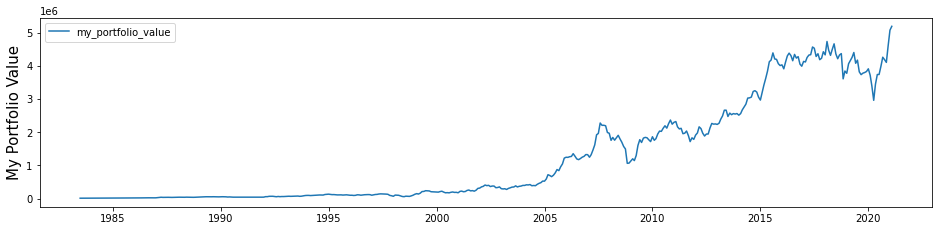

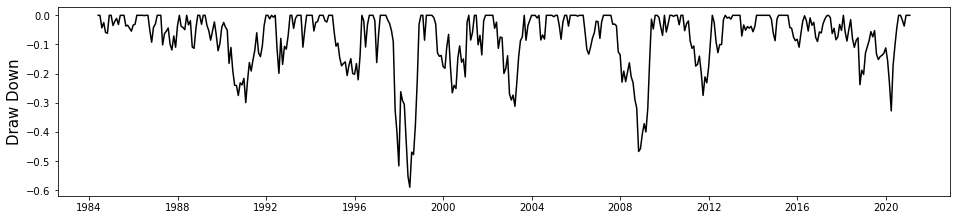

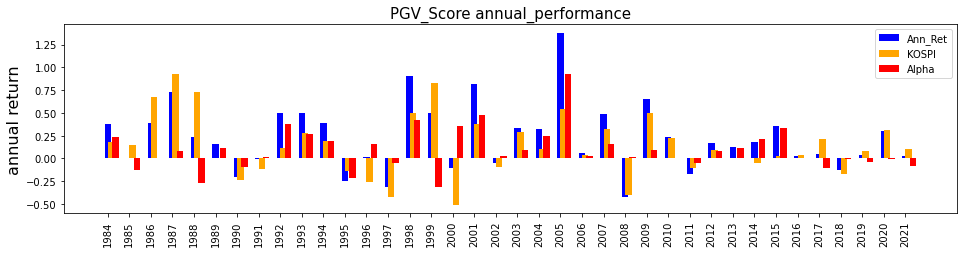

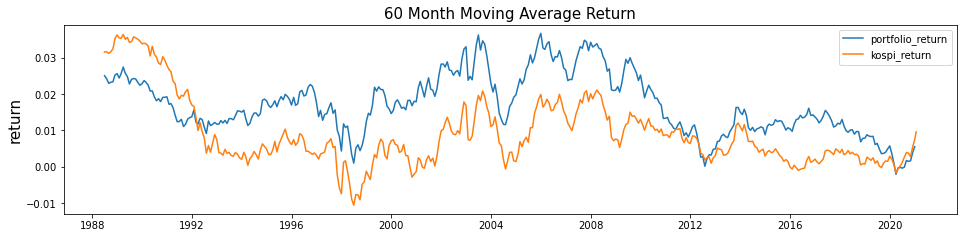

In [6]:
Smart_Beta_Asset_Allocation.plotting_backtest(PF , cleaned_kospi_rf, ma_month = 60 , strategy_name = 'PGV_Score')

In [7]:
PF =Smart_Beta_Asset_Allocation.backtest(Smart_Beta_Asset_Allocation.F_score , '1983-06-30', '2020-12-31', cleaned_data, cleaned_price, 
                                    cleaned_mkt, delist_data, stop_data,cleaned_kospiyn,
                                    rebalance_freq = 3, number_of_stock = 50, initial_money = 10000,fee = 0.006) 
Smart_Beta_Asset_Allocation.port_performance(PF, cleaned_kospi_rf) 

,initial,final,CAGR,Stdev,MDD,Sharp,Best_Year,Worst_Year,Market_Corr
1983-06 ~ 2021-01,10000.0,3065238.0,0.164,0.285,-0.633,0.578,1.09,-0.385,0.764


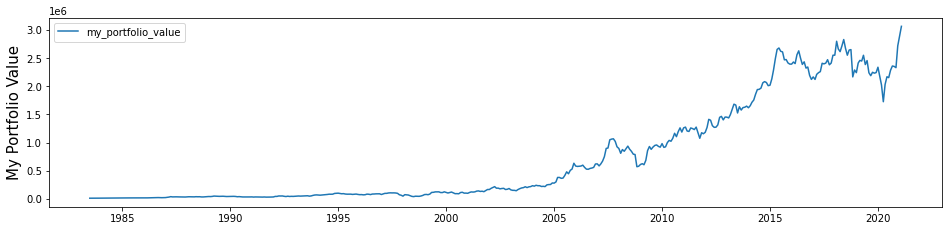

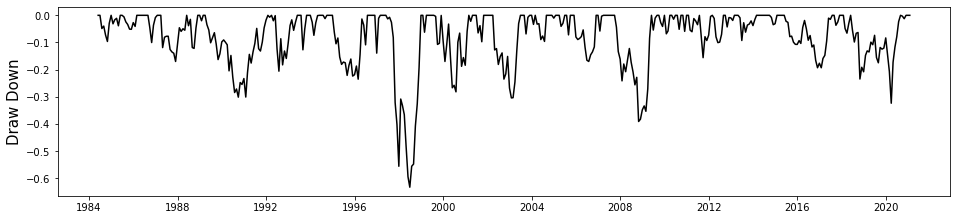

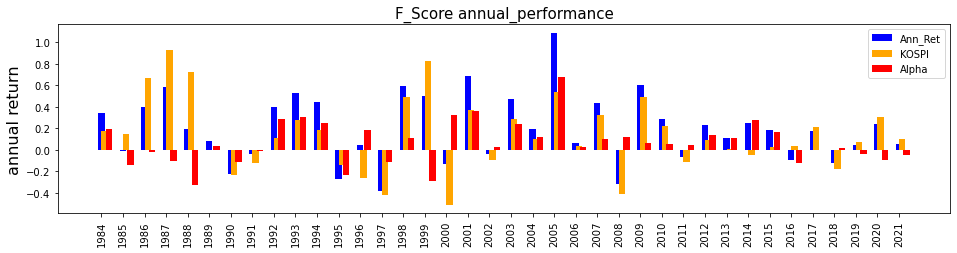

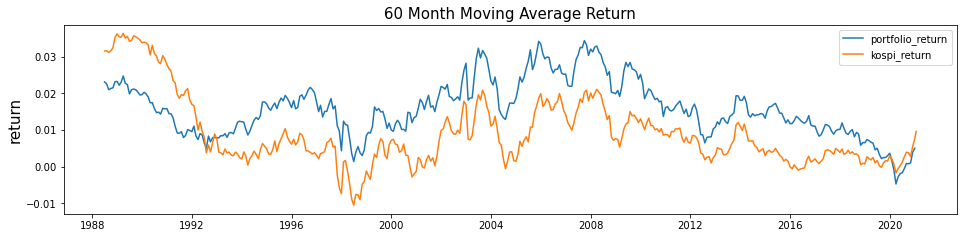

In [8]:
Smart_Beta_Asset_Allocation.plotting_backtest(PF , cleaned_kospi_rf, ma_month = 60 , strategy_name = 'F_Score')

In [9]:
PF = Smart_Beta_Asset_Allocation.asset_allocation_backtest(Smart_Beta_Asset_Allocation.F_score , '1996-01-31', '2020-12-31' , cleaned_data, cleaned_price,
                              cleaned_mkt, delist_data, stop_data, cleaned_kospiyn, 
                              cleaned_hedge_value,w_stock = 0.4, w_cash = 0.05 , 
                              rebalance_freq = 3, number_of_stock = 50, initial_money = 10000, fee = 0.006)
Smart_Beta_Asset_Allocation.port_performance(PF, cleaned_kospi_rf)

,initial,final,CAGR,Stdev,MDD,Sharp,Best_Year,Worst_Year,Market_Corr
1996-01 ~ 2020-12,9966.006,105024.844,0.099,0.119,-0.281,0.831,0.378,-0.069,0.538


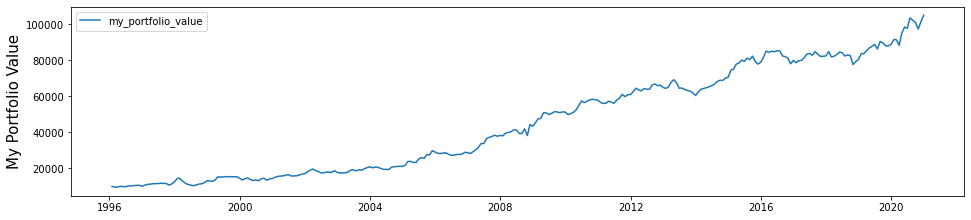

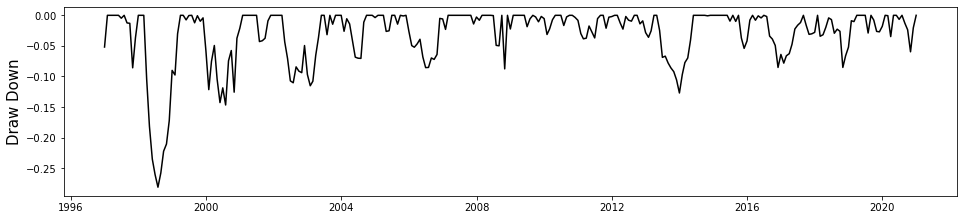

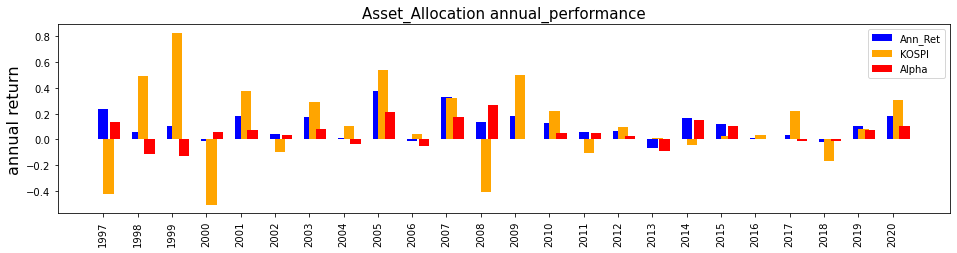

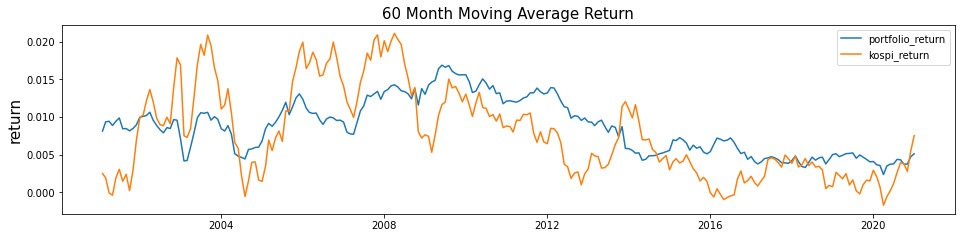

In [10]:
Smart_Beta_Asset_Allocation.plotting_backtest(PF , cleaned_kospi_rf, ma_month = 60 , strategy_name = 'Asset_Allocation')